## Fraud Detection in Financial Services Using ML Models

**Evaluation Project By Bisola Beauty Ayankoya**

## Project Description

This project aims to leverage synthetic data generated by BankSim, an agent-based simulator of bank payments, to enhance fraud detection methods in banking systems using machine learning models.Utilizing aggregated transactional data from a bank in Spain, BankSim produces synthetic data sets that mimic real-world scenarios while safeguarding customer privacy.

**About the Banksim Dataset**

BankSim is built upon a sample of aggregated transactional data sourced from a bank in Spain. It employs statistical analysis and Social Network Analysis (SNA) techniques to model the relationships between merchants and customers. The simulator aims to replicate normal payments while injecting known fraud signatures, thereby creating synthetic data sets ideal for fraud detection research.In total, BankSim produced 594,643 records, comprising both normal payments and fraudulent transactions.
Here is a link to the dataset on Kaggle-https://www.kaggle.com/datasets/ealaxi/banksim1

In [1]:
# Import all required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

# Importing The Dataset

In [2]:
df_fraud = pd.read_csv("frauddata.csv")

In [3]:
# Exploring the data
df_fraud.head(15)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
5,0,'C1315400589','3','F','28007','M348934600','28007','es_transportation',25.81,0
6,0,'C765155274','1','F','28007','M348934600','28007','es_transportation',9.10,0
7,0,'C202531238','4','F','28007','M348934600','28007','es_transportation',21.17,0
8,0,'C105845174','3','M','28007','M348934600','28007','es_transportation',32.40,0
9,0,'C39858251','5','F','28007','M348934600','28007','es_transportation',35.40,0


In [4]:
df_fraud.tail(15)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
594628,179,'C423891632','5','M','28007','M1823072687','28007','es_transportation',2.32,0
594629,179,'C1990073844','4','M','28007','M1823072687','28007','es_transportation',29.37,0
594630,179,'C408690006','1','M','28007','M85975013','28007','es_food',43.04,0
594631,179,'C575345520','2','F','28007','M348934600','28007','es_transportation',7.40,0
594632,179,'C1039390058','4','M','28007','M1352454843','28007','es_hotelservices',224.81,0
594633,179,'C1039390058','4','M','28007','M45060432','28007','es_hotelservices',190.31,0
594634,179,'C728039227','6','M','28007','M348934600','28007','es_transportation',27.93,0
594635,179,'C728039227','6','M','28007','M1823072687','28007','es_transportation',30.04,0
594636,179,'C1904086644','5','F','28007','M1823072687','28007','es_transportation',28.93,0
594637,179,'C748358246','2','M','28007','M1823072687','28007','es_transportation',51.17,0


## Exploratory Data Analysis(EDA)

In [5]:
# Let's Display the first few rows of the dataset
df_fraud.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


**Fraud Data**
These has 9 feature columns and 1 target column which is a binary variable-: fraud (1=Fraudulent transactions and 0 for Normal transactions). 
The feature Includes :
* **Step**: This is the day from the start of simulation.The simulation ran for virtually 6 months with 180 steps .
* **Customer**: This is the customer id.
* **zipCodeOrigin**: This is the zip code of origin/source.
* **Merchant**: This is the merchant's id
* **zipMerchant**: This is the merchant's zip code
* **Age**: Categorized age 
    * 0: <= 18, 
    * 1: 19-25, 
    * 2: 26-35, 
    * 3: 36-45,
    * 4: 46:55,
    * 5: 56:65,
    * 6: > 65
    * U: Unknown
* **Gender**: This is the Gender for customer
     * E : Enterprise,
     * F: Female,
     * M: Male,
     * U: Unknown
* **Category**: Is the Category of the purchase. We will get to see all categories later in our analysis.
* **Amount**: This is the amount of the purchase
* **Fraud**: Is the Target variable which shows if the transaction fraudulent(1) or benign(0)

In [6]:
#Checking the dataset dimension
df_fraud.shape

(594643, 10)

This dataset contains 594,643 rows and 10 columns.Out of which 1 is target variable and the remaining 9 are independent varbiables.

In [7]:
df_fraud.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

In [8]:
# Checking the columns of dataset
df_fraud.columns.tolist()

['step',
 'customer',
 'age',
 'gender',
 'zipcodeOri',
 'merchant',
 'zipMerchant',
 'category',
 'amount',
 'fraud']

In [9]:
# checking the types of columns
df_fraud.dtypes

step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object

There are three(3) different types of data(int64,object and float) present in the dataset.

In [10]:
#checking the null values
df_fraud.isnull().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [11]:
df_fraud.isnull().sum().sum()

0

In [12]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


As we can see there were no null or missing values present in this dataset.

<AxesSubplot:>

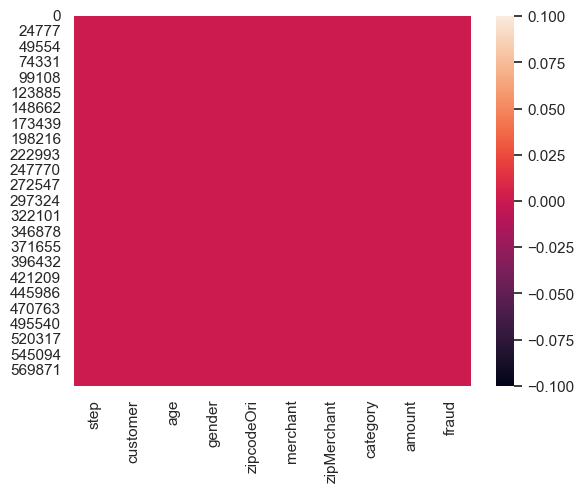

In [13]:
#Lets visualize it using heatmap
sns.heatmap(df_fraud.isnull())

We can clearly visualize there are no missing data present.

In [14]:
# To get good overview of the dataset
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


## The Dataset Description

In [15]:
# Summary Statistics of numerical columns
df_fraud.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


**This provides statistical details about the numerical columns. The dataset summary appears flawless as it contains no negative or invalid values.**

From the above description,our observations  are as follows:

i.   All column counts are equal, indicating no missing values in the dataset.

ii.  The mean exceeds the median (50th percentile) in both the amount and fraud columns, indicating right skewness in these columns.

iii.  The step column's mean is lower than its median, suggesting left skewness in the data.

iv.  A significant disparity between the 75th percentile and the maximum value implies the presence of outliers.
Additionally, noteworthy details such as the standard deviation, minimum value, and 25th percentile can be gleaned from the data summary.

In [16]:
catfd = df_fraud.filter(['age','gender','category', 'fraud'])
catfd.apply(lambda x: x.value_counts()).T.stack()

age       '0'                          2452.0
          '1'                         58131.0
          '2'                        187310.0
          '3'                        147131.0
          '4'                        109025.0
          '5'                         62642.0
          '6'                         26774.0
          'U'                          1178.0
gender    'E'                          1178.0
          'F'                        324565.0
          'M'                        268385.0
          'U'                           515.0
category  'es_barsandrestaurants'      6373.0
          'es_contents'                 885.0
          'es_fashion'                 6454.0
          'es_food'                   26254.0
          'es_health'                 16133.0
          'es_home'                    1986.0
          'es_hotelservices'           1744.0
          'es_hyper'                   6098.0
          'es_leisure'                  499.0
          'es_otherservices'      

<AxesSubplot:>

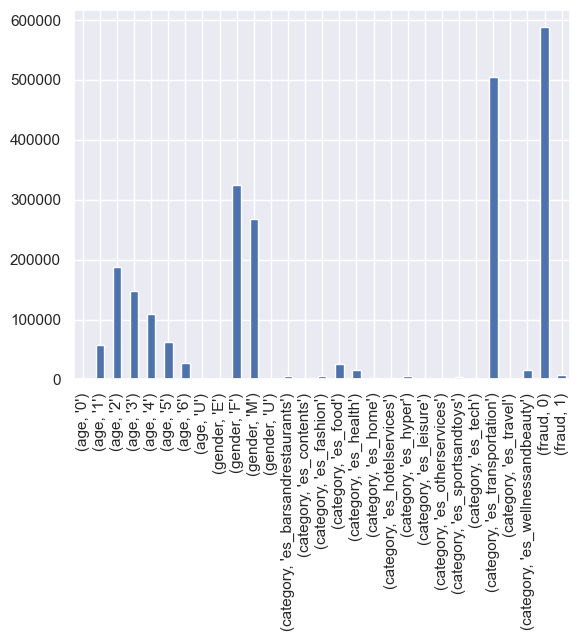

In [17]:
catfd.apply(pd.value_counts).T.stack().plot(kind='bar')

**FEATURES BALANCING**

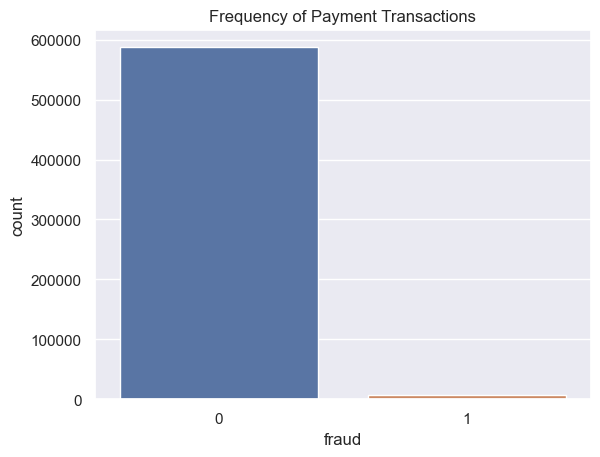

Number of normal transactions:  587443
Number of fraudulent transactions:  7200


In [18]:
fraud_transaction = df_fraud.loc[df_fraud.fraud == 1] 
nonfraud_transaction = df_fraud.loc[df_fraud.fraud == 0]

sns.countplot(x="fraud",data=df_fraud)
plt.title("Frequency of Payment Transactions")
plt.show()
print("Number of normal transactions: ",nonfraud_transaction.fraud.count())
print("Number of fraudulent transactions: ",fraud_transaction.fraud.count())

The fraud data, as depicted above, exhibits an imbalance evident from the frequency distribution and bar chart illustrations. Such imbalanced data carries inherent biases and poses potential threats to machine learning models.

**SMOTE (Synthetic Minority Over-sampling Technique)**

SMOTE is an oversampling technique which generates additional data points for the minority class by leveraging neighboring instances. This process ensures that the created samples are not duplicates but bear similarity to existing instances within the dataset.

In [19]:
print((df_fraud.groupby('fraud')['amount'].sum()).reset_index().rename(
    columns={'fraud':'Fraud','amount' : 'Amount Volume'}).sort_values(
    by='Amount Volume'))

   Fraud  Amount Volume
1      1     3822671.17
0      0    18708432.56


**In which of the business Sector/categories are fraudsters most active?**

This inquiry can be addressed by organizing the 'amount' feature based on similar 'category' features, indicating the quantities of fraudulent and legitimate(non-fraud) transactions. Furthermore, to enhance inference, it's beneficial to display the percentage of fraudulent transactions relative to the total combined transactions as shown below:


In [20]:
# Dataframes with fraud and non-fraud data 

pd.concat([df_fraud.groupby('category')['amount'].mean(),nonfraud_transaction.groupby('category')['amount'].mean(),\
           df_fraud.groupby('category')['fraud'].mean()*100],keys=["Fraudulent","Non-Fraudulent","Fraud %"],axis=1,\
          sort=False).sort_values(by=['Non-Fraudulent'])

,Fraudulent,Non-Fraudulent,Fraud %
category,,,
'es_transportation',26.958187,26.958187,0.000000
'es_food',37.070405,37.070405,0.000000
'es_hyper',45.970421,40.037145,4.591669
'es_barsandrestaurants',43.461014,41.145997,1.882944
'es_contents',44.547571,44.547571,0.000000
'es_wellnessandbeauty',65.511221,57.320219,4.759380
'es_fashion',65.666642,62.347674,1.797335
'es_leisure',288.911303,73.230400,94.989980
'es_otherservices',135.881524,75.685497,25.000000


These table shows the biggest frauds in travel, leisure, sporting-and-toys and hotel services categories.

**Analyzing the overall Spending distribution among various sectors**

**Visualizing Using Boxplot**

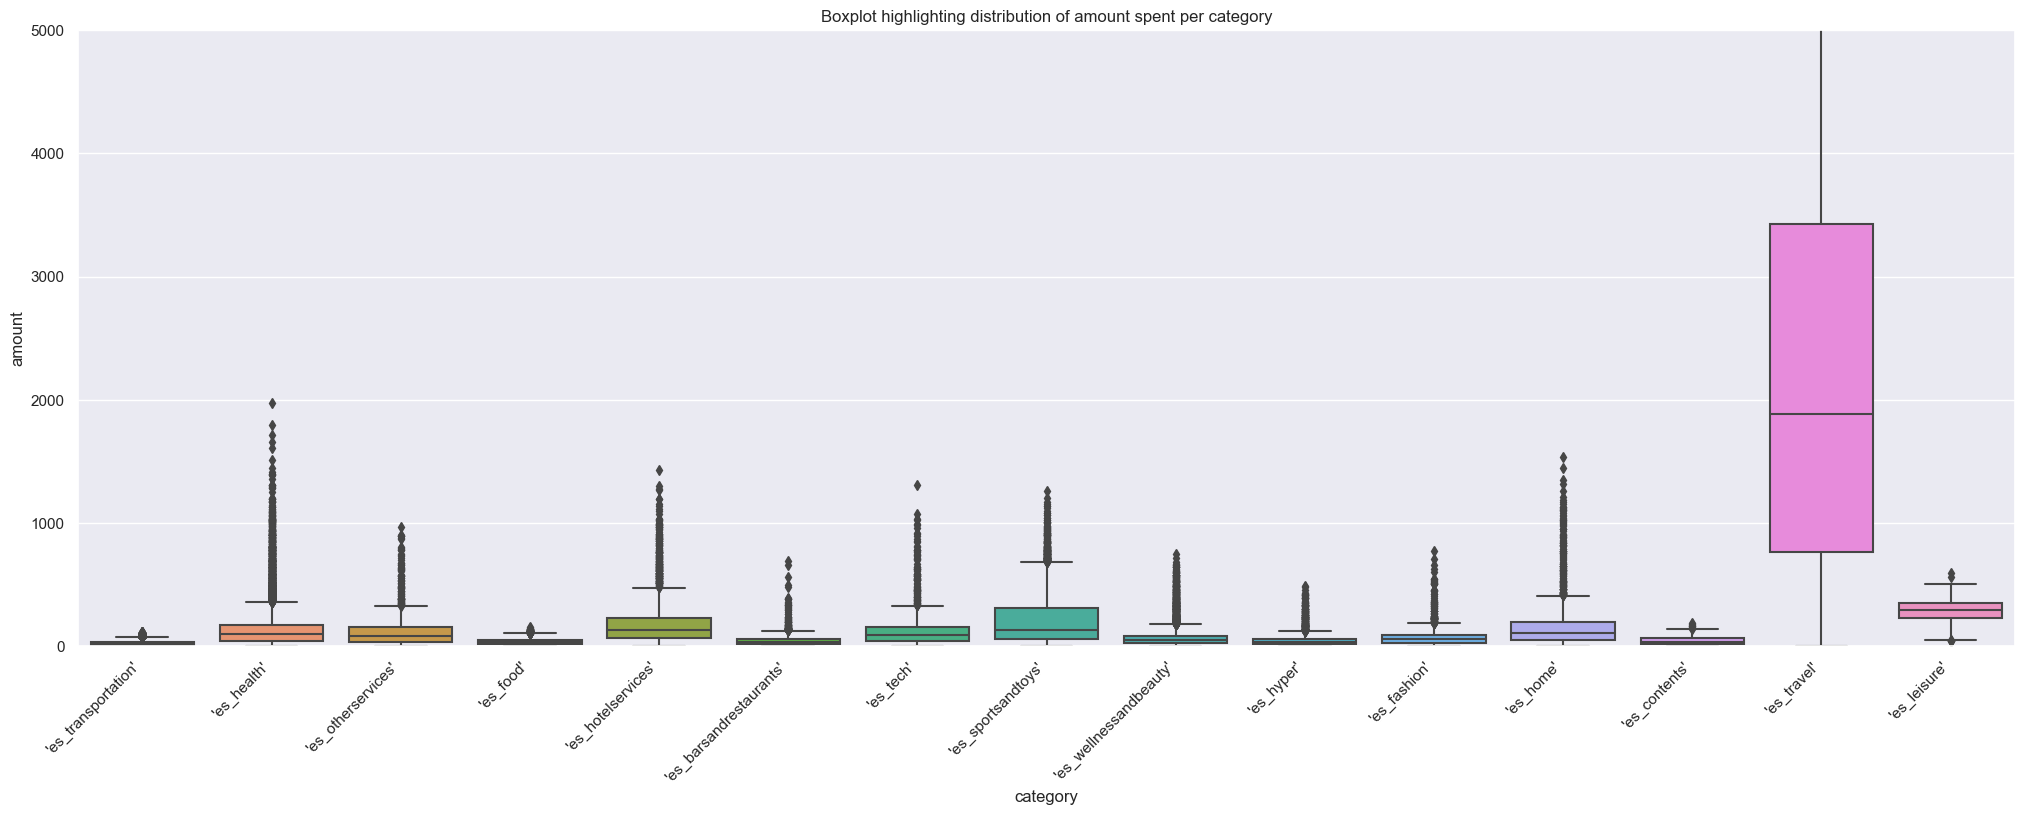

In [21]:
# Lets Plot the histograms for fraud and non-fraud data 
plt.figure(figsize=(25,8))
sns.set(style="darkgrid")
distfraud = sns.boxplot(x=df_fraud.category,y=df_fraud.amount, orient='v');
plt.title("Boxplot highlighting distribution of amount spent per category"),
plt.ylim(0,5000)
distfraud.set_xticklabels(distfraud.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Looking at the boxplot, it's evident that the travel industry exhibits notably high expenditure levels, outliers notwithstanding. Moreover, the average spending across sectors doesn't show significant variation, predominantly falling within the range of 0 to 500.

**THE DISTRIBUTION OF TRANSACTION VOLUMES OF FRAUD & NON FRAUD PAYMENTS COMPARED**

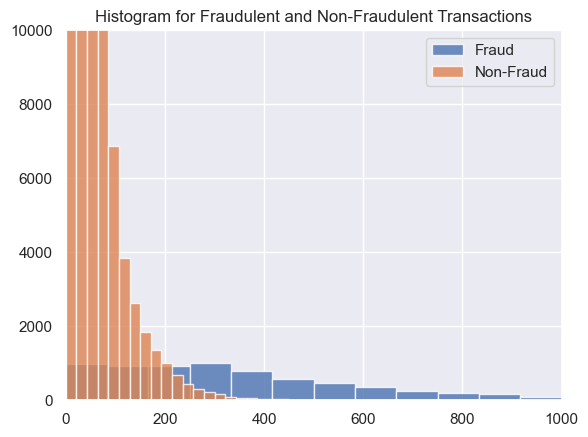

In [22]:
# Histograms of fraudulent and non-fraudulent data 
plt.hist(fraud_transaction.amount, alpha=0.8, label='Fraud',bins=100)
plt.hist(nonfraud_transaction.amount, alpha=0.8, label='Non-Fraud',bins=100)
plt.title("Histogram for Fraudulent and Non-Fraudulent Transactions")
plt.ylim(0,10000)
plt.xlim(0,1000)
plt.legend()
plt.show()

The Histogram here, effectively displays the distribution of transaction volumes for both fraudulent and non-fraudulent payments. This is facilitated by the continuous nature of the 'AMOUNT' feature. Additionally, it's evident that while fraudulent transactions are fewer in number, their respective amounts are notably higher.

**How is fraud carried out among different age demographics?**

This question could be displayed in a table with the occurrences of fraud (grouped as 1) represented as a percentage or fraction.

   Age  Fraud Percent
7  'U'       0.594228
6  '6'       0.974826
5  '5'       1.095112
1  '1'       1.185254
3  '3'       1.192815
2  '2'       1.251401
4  '4'       1.293281
0  '0'       1.957586


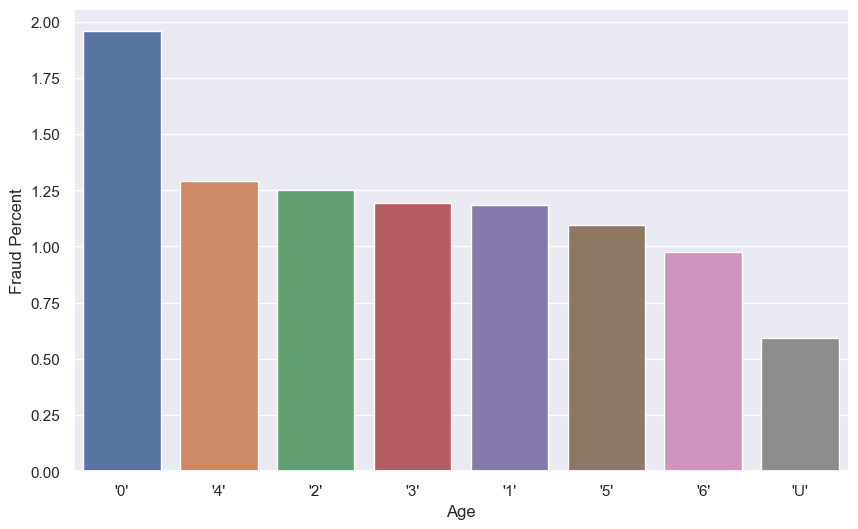

In [23]:
# Percentage of fraud by age groups
print((df_fraud.groupby('age')['fraud'].mean()*100).reset_index().rename(
    columns={'age':'Age','fraud' : 'Fraud Percent'}).sort_values
      (by='Fraud Percent'))

# Computing percentage of fraud by age groups
fraud_percent_by_age = (df_fraud.groupby('age')['fraud'].mean() * 100).reset_index()

# Sorting the values by fraud percentage
fraud_percent_by_age_sorted = fraud_percent_by_age.sort_values(by='fraud', ascending=False)

# Renaming the columns
fraud_percent_by_age_sorted = fraud_percent_by_age_sorted.rename(columns={'age': 'Age', 'fraud': 'Fraud Percent'})

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Fraud Percent', data=fraud_percent_by_age_sorted, order=fraud_percent_by_age_sorted['Age'])
plt.show()

As observed,It appears that occurrences of fraud are notably higher among those aged 18 and under (categorized as the '0'th group). This finding prompts inquiry into whether this pattern stems from fraudsters purposefully falsifying their age to appear younger, possibly to mitigate repercussions, or if a considerable portion of this demographic genuinely comprises young individuals.

   Age  Fraud Count
7  'U'         1178
0  '0'         2452
6  '6'        26774
1  '1'        58131
5  '5'        62642
4  '4'       109025
3  '3'       147131
2  '2'       187310


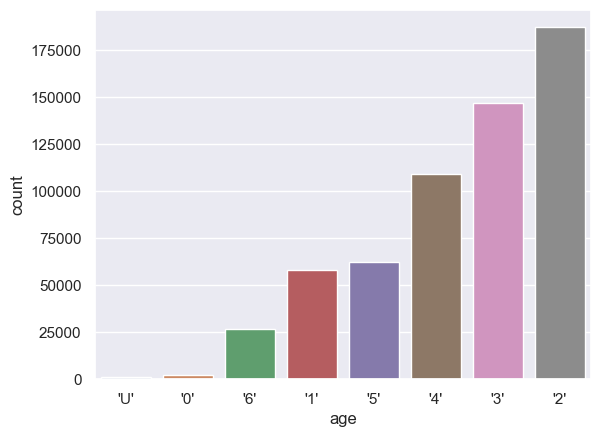

In [24]:
# Count of fraud by age group
df_fraud_count = df_fraud.groupby('age')['fraud'].count().reset_index().rename(
    columns={'age':'Age','fraud' : 'Fraud Count'}).sort_values(by='Fraud Count')

print(df_fraud_count)

ax = sns.countplot(x='age', data=df_fraud, order=df_fraud_count['Age'])
plt.show()

  Gender  Fraud Percent
3    'U'       0.000000
0    'E'       0.594228
2    'M'       0.907279
1    'F'       1.465962


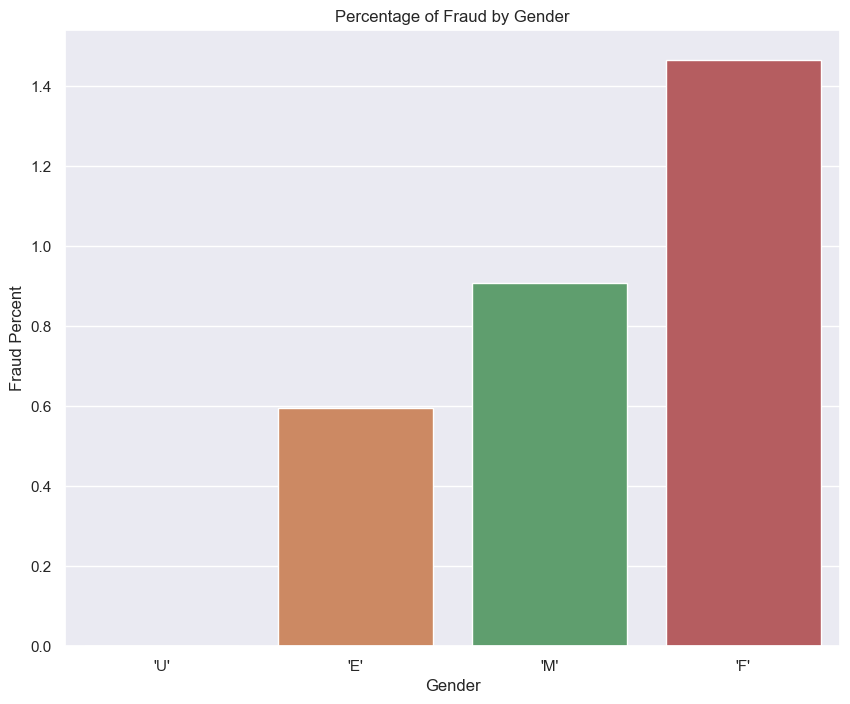

In [25]:
# Percentage of fraud by gender
print((df_fraud.groupby('gender')['fraud'].mean()*100).reset_index().rename(
    columns={'gender':'Gender','fraud' : 'Fraud Percent'}).sort_values
      (by='Fraud Percent'))

# Calculate percentage of fraud by gender
fraud_percent_by_gender = df_fraud.groupby('gender')['fraud'].mean() * 100
fraud_percent_by_gender_sorted = fraud_percent_by_gender.reset_index().rename(
    columns={'gender': 'Gender', 'fraud': 'Fraud Percent'}).sort_values(by='Fraud Percent')

# Plotting the results
plt.figure(figsize=(10, 8))
sns.barplot(x='Gender', y='Fraud Percent', data=fraud_percent_by_gender_sorted)
plt.xlabel('Gender')
plt.ylabel('Fraud Percent')
plt.title('Percentage of Fraud by Gender')
plt.show()

  Gender  Fraud Count
3    'U'          515
0    'E'         1178
2    'M'       268385
1    'F'       324565


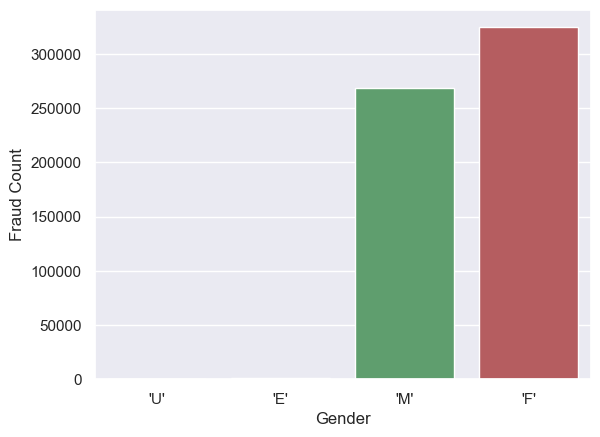

In [26]:
# Visualizing the count of Gender
gender_counts = df_fraud.groupby('gender')['fraud'].count().reset_index().rename(
    columns={'gender':'Gender','fraud' : 'Fraud Count'}).sort_values(by='Fraud Count')

print(gender_counts)

# Plotting
ax = sns.barplot(x='Gender', y='Fraud Count', data=gender_counts)
plt.show()

**Cross Tabulation**

In [27]:
# Age and gender of fraud count
pd.crosstab(index = df_fraud.age, columns = df_fraud.gender, values = df_fraud.fraud, aggfunc = 'sum', rownames=['Age Group'], colnames=['Gender'])

Gender,'E','F','M','U'
Age Group,,,,
'0',NaN,39.0,9.0,NaN
'1',NaN,496.0,193.0,0.0
'2',NaN,1642.0,702.0,0.0
'3',NaN,1099.0,656.0,0.0
'4',NaN,811.0,599.0,NaN
'5',NaN,527.0,159.0,NaN
'6',NaN,144.0,117.0,NaN
'U',7.0,NaN,NaN,NaN


**Data Preprocessing and Feature engineering**

Here we preprocess and prepare the data for the training.

**Drop the Unique zipCode value**

In [28]:
# Let's Drop zipcodeori and zipMerchant because they have only one unique value
data_reduced = df_fraud.drop(['zipcodeOri','zipMerchant'],axis=1)

print("Unique zipCodeOri values: ",df_fraud.zipcodeOri.nunique())
print("Unique zipMerchant values: ",df_fraud.zipMerchant.nunique())

Unique zipCodeOri values:  1
Unique zipMerchant values:  1


In [29]:
# Lets check out the data after dropping
data_reduced.columns

Index(['step', 'customer', 'age', 'gender', 'merchant', 'category', 'amount',
       'fraud'],
      dtype='object')

**DATA MAPPING**

This involves the transformation of the categorical features into numerical values. e.g F in sex becomes 1 and M becomes 2, transforms alphabetically.

In [30]:
# Turning object columns type to categorical
col_categorical = data_reduced.select_dtypes(include= ['object']).columns
for col in col_categorical:
    data_reduced[col] = data_reduced[col].astype('category')
    
# categorical values --> numeric values
data_reduced[col_categorical] = data_reduced[col_categorical].apply(lambda x: x.cat.codes)
data_reduced.head(6)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0
5,0,694,3,1,30,12,25.81,0


###  DATA VISUALIZATION

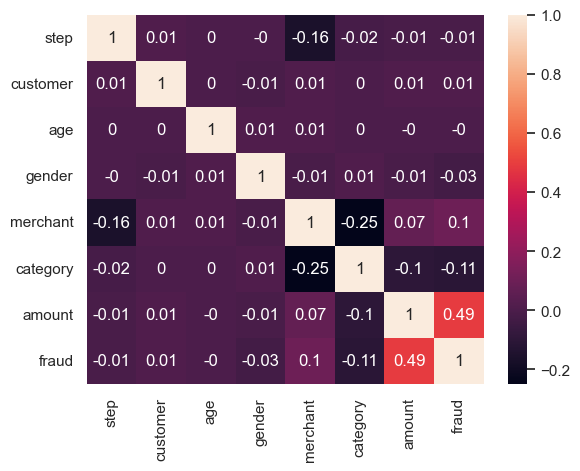

In [31]:
# Visualizing the correlation matrix using heatmap
corrmatx = data_reduced.corr().round(2)
sns.heatmap(corrmatx, annot=True)
plt.show()

In [32]:
# Statistical Summary of numerical
data_reduced.describe()

,step,customer,age,gender,merchant,category,amount,fraud
count,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000
mean,94.986827,2042.317776,3.014151,1.451089,23.866580,11.066393,37.890135,0.012108
std,51.053632,1185.491845,1.335884,0.503291,8.590215,2.817118,111.402831,0.109369
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,1020.000000,2.000000,1.000000,18.000000,12.000000,13.740000,0.000000
50%,97.000000,2030.000000,3.000000,1.000000,18.000000,12.000000,26.900000,0.000000
75%,139.000000,3059.000000,4.000000,2.000000,30.000000,12.000000,42.540000,0.000000
max,179.000000,4111.000000,7.000000,3.000000,49.000000,14.000000,8329.960000,1.000000


### SPLITTING THE VARIABLES INTO TARGET(Y) AND FEATURES(X)

In [33]:
# Defining the independent variable (x) and (y) as independant and dependent/target variable
x = data_reduced.drop(['fraud'],axis=1)
y = data_reduced['fraud']
print(x.head(),"\n")
print(y.head())
x = data_reduced.drop(['fraud'],axis=1)
x = data_reduced.drop(['fraud'],axis=1)
y = data_reduced['fraud']
print(x.head(),"\n")
print(y.head())

   step  customer  age  gender  merchant  category  amount
0     0       210    4       2        30        12    4.55
1     0      2753    2       2        30        12   39.68
2     0      2285    4       1        18        12   26.89
3     0      1650    3       2        30        12   17.25
4     0      3585    5       2        30        12   35.72 

0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64
   step  customer  age  gender  merchant  category  amount
0     0       210    4       2        30        12    4.55
1     0      2753    2       2        30        12   39.68
2     0      2285    4       1        18        12   26.89
3     0      1650    3       2        30        12   17.25
4     0      3585    5       2        30        12   35.72 

0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64


In [34]:
# Volume of frauds in y
y[y==1].count()  # Which is the same as the imbalanced data we had earlier, we will have to balance the data

7200

### Oversampling - Using SMOTE

In [35]:
sm = SMOTE(random_state=42) # So as to obtain same output 
x_res, y_res = sm.fit_resample(x, y)
y_res = pd.DataFrame(y_res)
print(y_res.value_counts())

fraud
0        587443
1        587443
dtype: int64


Applying the SMOTE, i.e. the **Synthetic Minority Oversampling Technique**, to balance the dataset has yielded results indicating an equal number of class instances (1 and 0).

#### SPLITTING THE DATASET INTO TRAIN AND TEST (70:30 RULE)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.3,random_state=42,
                                                    shuffle=True,stratify=y_res)

### GENERATE THE ROC_AUC CURVE

In [37]:
# Plotting ROC_AUC curve

def plot_roc_auc(y_test, preds):
    '''
    Takes actual and predicted(probabilities) as input and plots the Receiver
    Operating Characteristic (ROC) curve
    '''
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### Base Accuracy Score

Many datasets on fraud tend to exhibit an imbalance, wherein non-fraudulent instances vastly outnumber fraudulent ones.

In these current dataset, fraud occurrences constitute less than 5% of all entries. If the data is not balanced before modeling, the prediction would heavily favor **non-fraudulent** instances, exceeding 85%. Hence, a baseline accuracy is computed that our models need to outperform. Achieving this not only indicates superior performance but also validates the efficacy of the balancing method derived from the original dataset.

In [38]:
# Base accuracy score should be better than always predicting the non-fraduelent
print("Base accuracy score to out-wit is: ", 
      nonfraud_transaction.fraud.count()/ np.add(nonfraud_transaction.fraud.count(),fraud_transaction.fraud.count()) * 100)

Base accuracy score to out-wit is:  98.7891894800746


## Machine Learning Model

### Traditional Machine Learning Models:

### Logistic Regression

In [39]:
lr = LogisticRegression()

In [40]:
lr.fit(x_train, y_train)

LogisticRegression()

Classification Report for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92    176233
           1       0.95      0.89      0.92    176233

    accuracy                           0.92    352466
   macro avg       0.92      0.92      0.92    352466
weighted avg       0.92      0.92      0.92    352466

Confusion Matrix of Logistic Regression: 
 [[167539   8694]
 [ 19063 157170]]


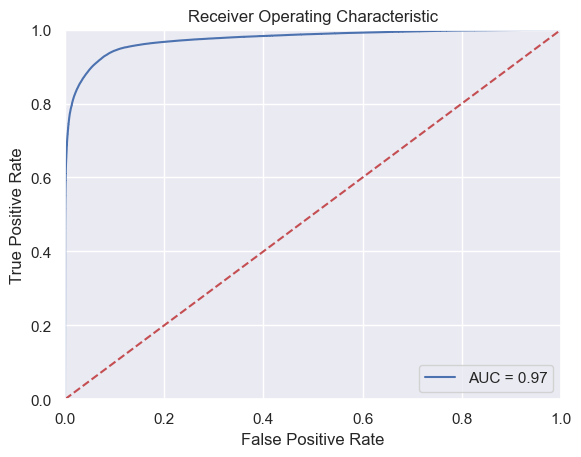

In [41]:
lr_ypred = lr.predict(x_test)
print("Classification Report for Logistic Regression: \n", classification_report(y_test, lr_ypred))
print("Confusion Matrix of Logistic Regression: \n", confusion_matrix(y_test,lr_ypred))
plot_roc_auc(y_test, lr.predict_proba(x_test)[:,1])

### Decision Trees Classifier

In [42]:
Dtree = DecisionTreeClassifier()

In [43]:
Dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
Dtree_ypred = Dtree.predict(x_test)

Classification Report for DecisionTree: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    176233
           1       0.99      1.00      0.99    176233

    accuracy                           0.99    352466
   macro avg       0.99      0.99      0.99    352466
weighted avg       0.99      0.99      0.99    352466

Confusion Matrix of DecisionTree: 
 [[174674   1559]
 [   744 175489]]


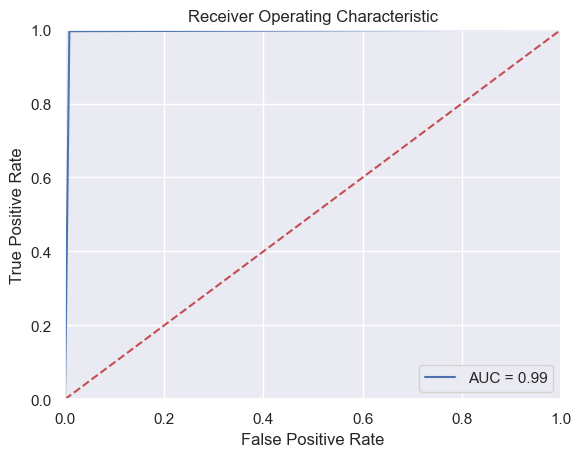

In [45]:
print("Classification Report for DecisionTree: \n", classification_report(y_test, Dtree_ypred))
print("Confusion Matrix of DecisionTree: \n", confusion_matrix(y_test,Dtree_ypred))
plot_roc_auc(y_test, Dtree.predict_proba(x_test)[:,1])

### K-Nearest Neighbors(KNN) Classifier

In [46]:
KNN = KNeighborsClassifier(n_neighbors=5,p=1)

In [47]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(p=1)

In [48]:
y_pred = KNN.predict(x_test)

Classification Report for K-Nearest Neighbours: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    176233
           1       0.98      1.00      0.99    176233

    accuracy                           0.99    352466
   macro avg       0.99      0.99      0.99    352466
weighted avg       0.99      0.99      0.99    352466

Confusion Matrix of K-Nearest Neigbours: 
 [[171999   4234]
 [   362 175871]]


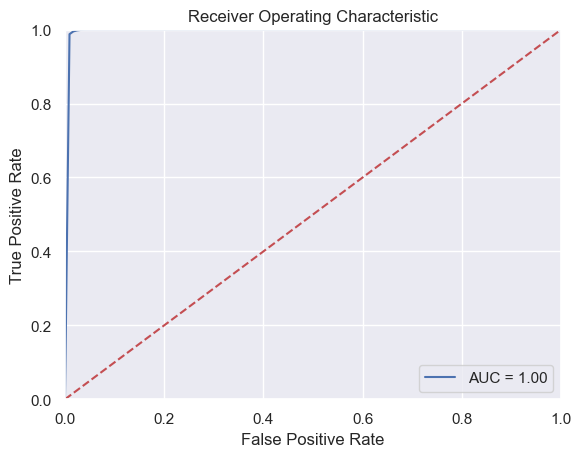

In [49]:
print("Classification Report for K-Nearest Neighbours: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of K-Nearest Neigbours: \n", confusion_matrix(y_test,y_pred))
plot_roc_auc(y_test, KNN.predict_proba(x_test)[:,1])

### Ensemble Machine Learning Models:

### XGBoost(Extreme Gradient Boosting) Classifier

In [50]:
XGBoost = XGBClassifier()

In [51]:
XGBoost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [52]:
y_pred = XGBoost.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    176233
           1       0.99      1.00      0.99    176233

    accuracy                           0.99    352466
   macro avg       0.99      0.99      0.99    352466
weighted avg       0.99      0.99      0.99    352466



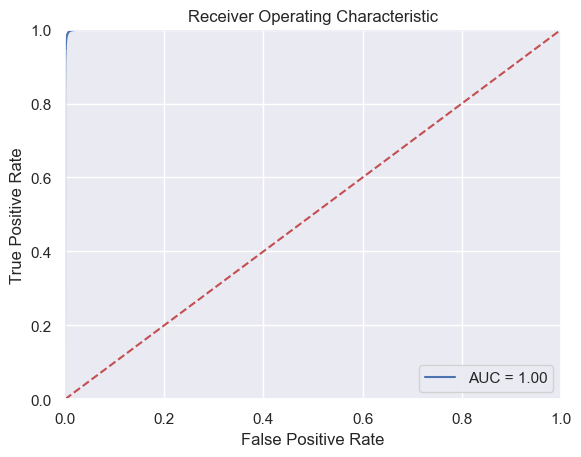

In [53]:
def plot_roc_auc(y_test, preds):
    '''
    Takes actual and predicted(probabilities) as input and plots the Receiver
    Operating Characteristic (ROC) curve
    '''
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
print(classification_report(y_test, y_pred))
plot_roc_auc(y_test, XGBoost.predict_proba(x_test)[:,1])

## AdaBoost (Adaptive Boosting) Classifier

In [54]:
ABC = AdaBoostClassifier()

In [55]:
ABC.fit(x_train, y_train)

AdaBoostClassifier()

              precision    recall  f1-score   support

           0       0.96      0.97      0.97    176233
           1       0.97      0.96      0.96    176233

    accuracy                           0.97    352466
   macro avg       0.97      0.97      0.97    352466
weighted avg       0.97      0.97      0.97    352466



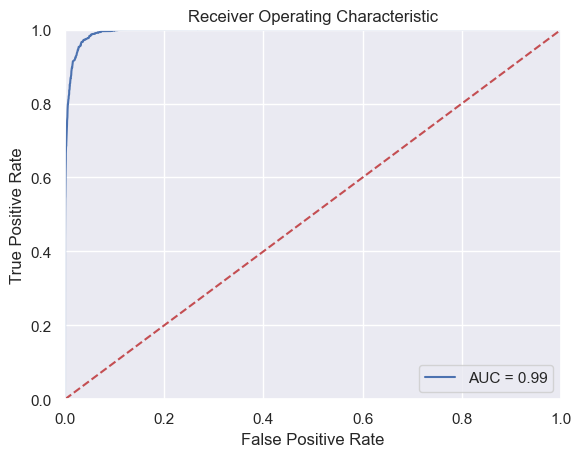

In [56]:
y_pred = ABC.predict(x_test)

def plot_roc_auc(y_test, preds):
    '''
    Takes actual and predicted(probabilities) as input and plots the Receiver
    Operating Characteristic (ROC) curve
    '''
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
print(classification_report(y_test, y_pred))
plot_roc_auc(y_test, ABC.predict_proba(x_test)[:,1])

### Bagging (Bootstrap Aggregating) Classifier

In [57]:
BC = BaggingClassifier()

In [58]:
BC.fit(x_train, y_train)

BaggingClassifier()

In [59]:
y_pred = BC.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    176233
           1       0.99      1.00      1.00    176233

    accuracy                           1.00    352466
   macro avg       1.00      1.00      1.00    352466
weighted avg       1.00      1.00      1.00    352466



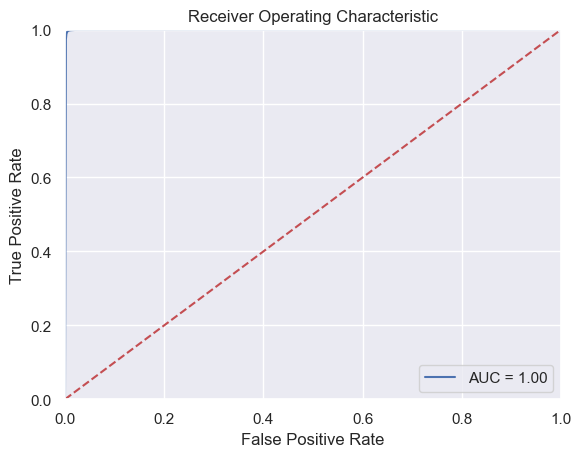

In [60]:
def plot_roc_auc(y_test, preds):
    '''
    Takes actual and predicted(probabilities) as input and plots the Receiver
    Operating Characteristic (ROC) curve
    '''
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
print(classification_report(y_test, y_pred))
plot_roc_auc(y_test, BC.predict_proba(x_test)[:,1])

### Random Forest Classifier

In [61]:
RF_clf = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=42,
                                verbose=1,class_weight="balanced")

In [62]:
RF_clf.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.1min


RandomForestClassifier(class_weight='balanced', max_depth=8, random_state=42,
                       verbose=1)

In [63]:
y_pred = RF_clf.predict(x_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s


Classification Report for Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    176233
           1       0.97      0.99      0.98    176233

    accuracy                           0.98    352466
   macro avg       0.98      0.98      0.98    352466
weighted avg       0.98      0.98      0.98    352466

Confusion Matrix of Random Forest Classifier: 
 [[170106   6127]
 [  1079 175154]]


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s


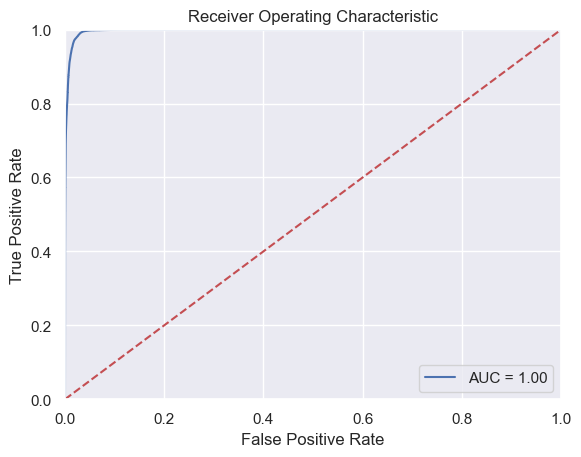

In [64]:
print("Classification Report for Random Forest Classifier: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of Random Forest Classifier: \n", confusion_matrix(y_test,y_pred))
plot_roc_auc(y_test, RF_clf.predict_proba(x_test)[:,1])

### Gradient Boosting Machines (GBM) Classifier

In [65]:
GBoost = GradientBoostingClassifier()

In [66]:
GBoost.fit(x_train, y_train)

GradientBoostingClassifier()

In [67]:
y_pred = GBoost.predict(x_test)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    176233
           1       0.97      0.99      0.98    176233

    accuracy                           0.98    352466
   macro avg       0.98      0.98      0.98    352466
weighted avg       0.98      0.98      0.98    352466



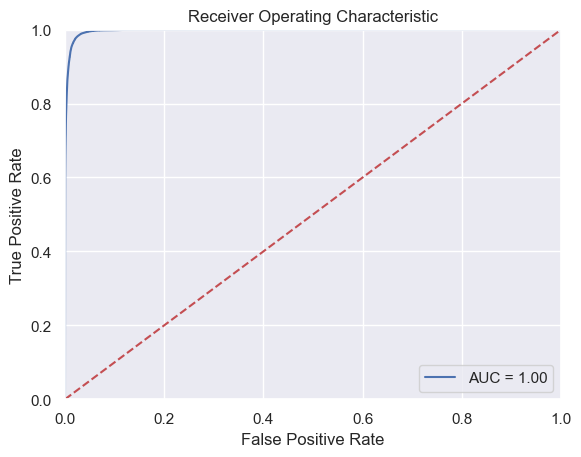

In [68]:
def plot_roc_auc(y_test, preds):
    '''
    Takes actual and predicted(probabilities) as input and plots the Receiver
    Operating Characteristic (ROC) curve
    '''
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
print(classification_report(y_test, y_pred))
plot_roc_auc(y_test, GBoost.predict_proba(x_test)[:,1])

## Summary and Conclussion


This project used a combination of traditional and ensemble machine learning techniques to predict fraudulent activities within the finance services sector, exploiting a dataset from Spain. Initial data exploration revealed an imbalance in the dataset, prompting the usage of the SMOTE balancing method. Notably, all the models gave **ROC_AUC** of (1.00), except for **logistic regression, decision tree and ADABoost Classifier**, which yielded **ROC_AUC** values below (1.00). Ensemble methods, such as **XGBoosting Classifier,Bagging Classifier, Random Forest Classifier, and Gradient Boosting Classifier**, displayed superior performance. These methods showcased high precision, recall, F1-score, **ROC-AUC scores** (all close to or at 1.00), and accuracy, indicating their effectiveness in accurately identifying fraudulent activities in financial transactions.

Ensemble techniques excel in capturing intricate data patterns crucial for detecting anomalies indicative of fraud. These findings underscore the efficiency of machine learning models, particularly ensemble approaches, in bolstering fraud detection capabilities within financial services, thereby mitigating financial risks and safeguarding stakeholders against fraudulent activities.

Continuous model evaluation and refinement are imperative to adapt to evolving fraud patterns and maintain high detection accuracy over time. Regular monitoring of model performance against new data and incorporation of feedback mechanisms are essential for enhancing fraud detection capabilities. leveraging machine learning models for fraud detection in financial services offers promising avenues for improving detection accuracy and minimizing financial losses. By carefully selecting and fine-tuning appropriate models, financial institutions can effectively reduce the risks associated with fraudulent activities while maintaining operational efficiency and customer trust.




### The End